In [1]:
import json

with open("history.json", "r") as f: 
    history = json.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ave_turns = np.mean([len(game['history']) for game in history])
all_words = [guess for game in history for h in game['history'] for guess in h['guesses']]
all_correct_words = [guess for game in history for h in game['history'] for guess in h['correct']]
guesses_per_turn = np.mean([len(h['guesses']) for game in history for h in game['history']])
total_n_words = len(all_words)
correct_n_words = len(all_correct_words)
ave_turns, total_n_words, correct_n_words, correct_n_words / total_n_words, guesses_per_turn

(5.84, 1215, 1200, 0.9876543209876543, 2.0804794520547945)

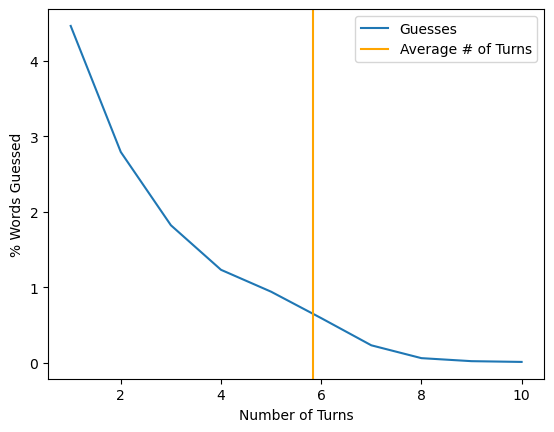

In [4]:
tries = np.zeros(10)
correct = np.zeros(10)
for game in history:
    for i,h in enumerate(game['history']):
        tries[i] += len(h['guesses'])
        correct[i] += len(h['correct'])

tries /= len(history)

plt.xlabel("Number of Turns")
plt.ylabel("% Words Guessed")
plt.plot(range(1,11), tries, label="Guesses")
plt.axvline(x = ave_turns, color = 'orange', label = 'Average # of Turns')
plt.legend()

In [5]:
import gensim.downloader as api

glove = api.load("glove-twitter-50")

In [6]:
# Interesting indexes: 49 Canada

In [7]:
from sklearn.decomposition import PCA

colors = ['green', 'blue', 'red', 'purple', 'orange', 'black', 'pink', 'yellow', 'lightgreen', 'magenta', 'cyan']

def plotGame(game):
    words = []
    embeddings = []
    cluster = []
    isClue = []
    pca = PCA(n_components = 2)
    for i,h in enumerate(game['history']):
        words.append(h['clue'])
        embeddings.append(glove[h['clue']])
        cluster.append(i)
        isClue.append(True)
        for word in h['correct']:
            words.append(word)
            embeddings.append(glove[word])
            cluster.append(i)
            isClue.append(False)
    embeddings = np.array(embeddings)
    embeddings = pca.fit_transform(embeddings)
    # print(len(isClue), len(cluster))
    for i, row in enumerate(embeddings):
        x, y = row
        # print(cluster[i])
        plt.scatter(x, y, marker = 'o' if isClue[i] else 'x', color=colors[cluster[i]])
        plt.text(x, y, words[i])

    clue_proxy = plt.scatter([], [], marker='o', color='black', label='Clue')
    guess_proxy = plt.scatter([], [], marker='x', color='black', label='Guess')
    
    plt.legend(handles=[clue_proxy, guess_proxy])
    plt.show()

In [8]:
plt.rcParams["figure.figsize"] = (10,8)

6


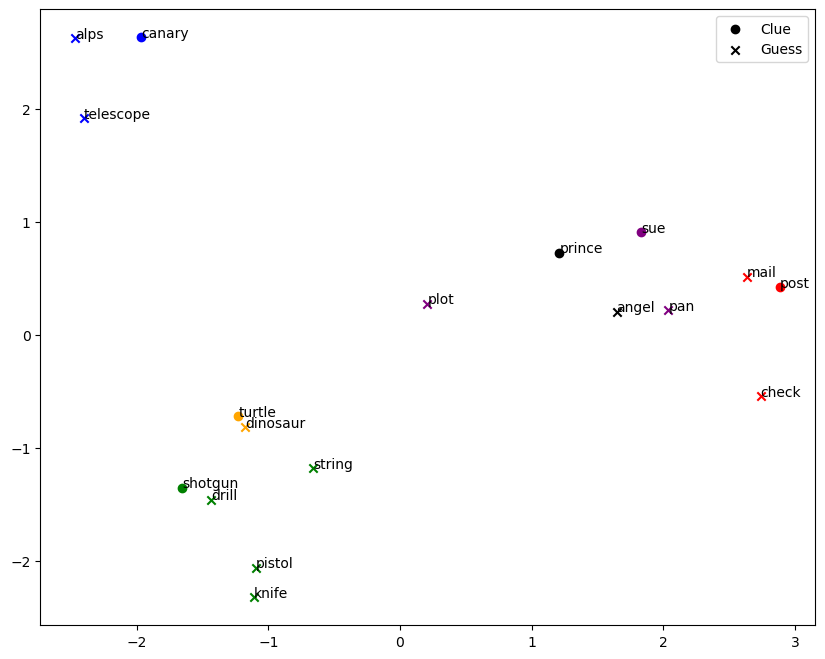

In [9]:
idx = 30

print(len(history[idx]['history']))
plotGame(history[idx])